Following the Qiskit textbook: https://qiskit.org/textbook/

@Mariana R. Barros

## Exploring the CNOT-Gate 

It's know that
$$CNOT |0+⟩ = \frac{1}{\sqrt{2}} (|00⟩ + |11⟩)$$

But what if we apply $CNOT |++⟩$ ?

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

<IPython.core.display.Latex object>

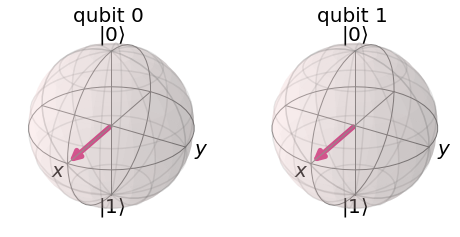

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Creating 

$$|−+⟩ = \frac{1}{2} |00⟩  +|01⟩ + |10⟩ -|11⟩$$

(putting the target qubit in the state  |−⟩ , so it has a negative phase)

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

<IPython.core.display.Latex object>

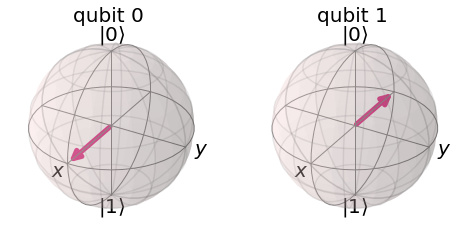

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())
# See the result
qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

If the CNOT acts on this state, we will swap the amplitudes of  
|01⟩  and  |11⟩ , resulting in the state:

$$CNOT |−+⟩ = \frac{1}{2} |00⟩  -|01⟩ - |10⟩ +|11⟩= |−-⟩ $$

This is interesting, because it affects the state of the control qubit while leaving the state of the target qubit unchanged.

┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

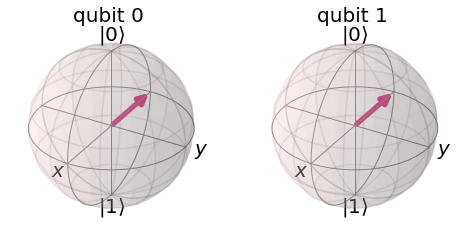

In [6]:
qc.cx(0,1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

If you remember the H-gate transforms  
|
+
⟩
→
|
0
⟩
  and  
|
−
⟩
→
|
1
⟩
 , we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction. 
 
 We can verify this using Qiskit's unitary simulator:

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

In [8]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

<IPython.core.display.Latex object>

# Phase Kickback 


Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation.

For example, we saw that performing an X-gate on a  
|
−
⟩
  qubit gives it the phase  −1 :

X
|
−
⟩

=
−
|
−
⟩

When our control qubit is in either  |0⟩ or  |1⟩, this phase affects the whole state, however it is a global phase and has no observable effects:

CNOT
|
−
0
⟩
=
|
−
⟩
⊗
|
0
⟩


=
|
−
0
⟩


CNOT
|
−
1
⟩
=
X
|
−
⟩
⊗
|
1
⟩
=
−
|
−
⟩
⊗
|
1
⟩
=
−
|
−
1
⟩

The interesting effect is when our control qubit is in superposition, the component of the control qubit that lies in the direction of  
|1⟩  applies this phase factor to the target qubit, which in turn kicks back a relative phase to our control qubit:

CNOT
|
−
+
⟩
=
1/√2
(
CNOT
|
−
0
⟩
+
CNOT
|
−
1
⟩
)

=
1/√2
(
|
−
0
⟩
+
X
|
−
1
⟩
)

=
1/√2
(
|
−
0
⟩
−
|
−
1
⟩
)
 
This can then be written as the two separable qubit states:

CNOT
|
−
+
⟩
=
|
−
⟩
⊗
1/√2
(
|
0
⟩
−
|
1
⟩
)

=
|
−
−
⟩

Wrapping the CNOT in H-gates transforms the qubits from the computational basis to the  
(
|
+
⟩
,
|
−
⟩
)
  basis, where we see this effect. This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits. We can use this identity to overcome this problem and allow CNOTs in both directions.



#### Kickback with the T-gate 


In [9]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

In [10]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

<IPython.core.display.Latex object>

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

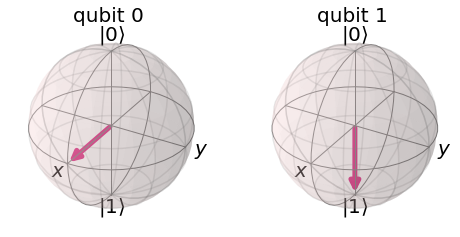

In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

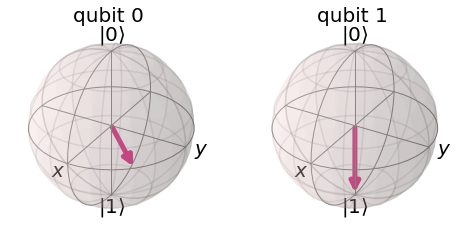

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)